# Tutorial 3
## Outline
* Numba
* Neural network in matrix notation
* Back propagation
* Activation functions
* Q&A on HW#2


## Numba and Code Acceleration

Numba will pre-compile code so that it can be executed more efficiently.<br>
[Numba documentation](http://numba.pydata.org/numba-doc/latest/user/index.html)

In [2]:
import numba
import numpy as np


In [3]:
# @numba.jit(nopython=True)
def test():
    i=0
    for a in range(100000):
        i+=a
    return i

%timeit test()

4.52 ms ± 42.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
@numba.jit(nopython=True)
def test():
    i=0
    for a in range(100000):
        i+=a
    return i

%timeit test()

The slowest run took 15.31 times longer than the fastest. This could mean that an intermediate result is being cached.
512 ns ± 829 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
@numba.jit(nopython=True)
def test():
    return np.sum(np.arange(1,100000))

%timeit test()

29 µs ± 1.14 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Neural network in matrix notation
![Neural network](http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/img/example_network.svg) <br>



$${h_j^l} = \sum_{i=0}^{n^{l-1}} w_{ij}^{l-1} h_{i}^{l-1}$$

$$h^l = h^{l-1} W^{l-1} + b$$


### Back propagation formula
The four equations for doing back propagation:
$$\begin{eqnarray}\delta^L&=&\nabla_aC\odot\sigma'(z^L) \\
\delta^l&=&((w^{l+1})^T\delta^{l+1})\odot\sigma'(z^l) \\ \frac{\partial C}{\partial b_j^l}&=&\delta_j^l \\
\frac{\partial C}{\partial w_{jk}^l}&=&a_k^{l-1}\delta_j^l
\end{eqnarray}$$

Credit: [Neural Networks and Deep Learning, Ch. 2](http://neuralnetworksanddeeplearning.com/chap2.html)

In [13]:
import numpy as np

[3,4,2]

class NN():
    def __init__(self, architecture, learning_rate, activation):
        #initializing the model
        self.arch = architecture
        self.activation = activation
        self.learning_rate = learning_rate
        self.depth = len(architecture)
        
    def init_weight(self):
        self.weights = []
        self.biases = []
        for l in range(self.depth - 1):
            prev_layer_num = self.arch[l]
            current_layer_num = self.arch[l+1]
            # generate randomizing matrix of size ((current_layer_num, prev_layer_num))
            self.weights.append(np.zeros((current_layer_num, prev_layer_num)))
            self.biases.append(np.zeros(current_layer_num))
            
    def calc_error(self, y, activation_grad):
        self.errors = []
        # To_Do
        return
        
    def calc_grad(self):
        # To_DO
        return
        
    def back_prop(self):
        for l in range(self.depth - 1):
            self.weights[l] = self.weights[l] - self.learning_rate * self.weights_grad[l]
            self.biases[l]  = self.biases[l]  - self.learning_rate * self.biases_grad[l]
            
    def feed_forward(self, x):
        self.z_s = []
        self.a_s = [x]
        for l in range(self.depth - 1):
            z_l = self.weights[l].dor(self.a_s[l-1]) + self.biases[l]
            a_l = self.activation(z_l)
            self.z_s.append(z_l)
            self.a_s.append(a_l)
            
    def fit(self, x, y):
        self.feed_forward(x)
        self.calc_error(y, activation_grad)
        self.calc_grad()
        
    def predict(self, x):
        return self.feed_forward(x)
            
            

In [11]:
class NN():
    def __init__(self, architecture, learning_rate, activation):
        # initializing the model
        self.arch = architecture
        self.activation = activation
        self.learning_rate = learning_rate
        self.depth = len(architecture)
        self.init_weight()
        
    def init_weight(self):
        self.weights = []
        self.biases = []
        for l in range(self.depth - 1):
            prev_layer_num = self.arch[l]
            current_layer_num = self.arch[l+1]
            # initialize weights randomly with values between 0 and 1.0
            self.weights.append(np.random.rand(current_layer_num, prev_layer_num))
            self.biases.append(np.zeros(current_layer_num))
            
    def calc_error(self, y, activation_grad):
        self.errors = []
        # calculate the error of the output layer
        delta = (self.a_s[-1] - y) * activation_grad(self.z_s[-1])
        self.errors.append(delta)
        # propagate the error backwards to previous layers
        for l in range(self.depth - 2, 0, -1):
            delta = (self.weights[l].T @ delta) * activation_grad(self.z_s[l-1])
            self.errors.append(delta)
        # reverse the errors to match the layer order
        self.errors = self.errors[::-1]
        
    def calc_grad(self):
        self.weights_grad = []
        self.biases_grad = []
        # calculate the gradients for each layer
        for l in range(self.depth - 1):
            weight_grad = np.outer(self.errors[l], self.a_s[l])
            bias_grad = self.errors[l]
            self.weights_grad.append(weight_grad)
            self.biases_grad.append(bias_grad)
            
    def back_prop(self):
        # update the weights and biases using the gradients and learning rate
        for l in range(self.depth - 1):
            self.weights[l] = self.weights[l] - self.learning_rate * self.weights_grad[l]
            self.biases[l] = self.biases[l] - self.learning_rate * self.biases_grad[l]
            
    def feed_forward(self, x):
        self.z_s = []
        self.a_s = [x]
        for l in range(self.depth - 1):
            z_l = self.weights[l] @ self.a_s[l] + self.biases[l]
            a_l = self.activation(z_l)
            self.z_s.append(z_l)
            self.a_s.append(a_l)
            
    def fit(self, x, y):
        self.feed_forward(x)
        self.calc_error(y, self.activation_grad)
        self.calc_grad()
        self.back_prop()
        
    def predict(self, x):
        self.feed_forward(x)
        return self.a_s[-1]
    
    def activation_grad(self, z):
        # calculate the derivative of the activation function
        if self.activation == 'sigmoid':
            return self.activation(z) * (1 - self.activation(z))
        elif self.activation == 'relu':
            return np.where(z > 0, 1, 0)
        else:
            return None


In [12]:
np.random.seed(0)
nn = NN([6,2,2], activation='tanh')
nn.init_wights()
print('Initialized prediction:', nn.predict(x))
nn.fit(x, y, tanh_grad)
print('Error in nodes', nn.errors)
print('Prediction after fitting once', nn.predict(x))


TypeError: __init__() missing 1 required positional argument: 'learning_rate'

## Activation functions
### Linear
$y=x$
<br>$y'=1$ <br>

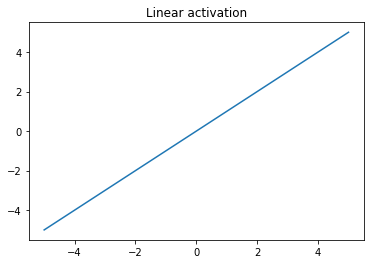

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
x=np.linspace(-5,5,2000)
y=x
plt.plot(x,y)
plt.title("Linear activation");

### tanh
$y=\tanh(x)$
<br>$y\in(-1,1)$
<br>$y'=1-y^2$



In [9]:
def tanh_grad(x):
    return 1 - np.tanh(x)**2

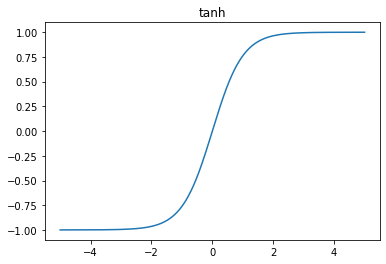

In [6]:
x=np.linspace(-5,5,2000)
y=np.tanh(x)
plt.plot(x,y)
plt.title("tanh");

### sigmoid
$y={\displaystyle \frac{1}{1+e^{-x}} }$
<br><br>$y\in(0,1)$
<br>$y'=y(1-y)$<br>

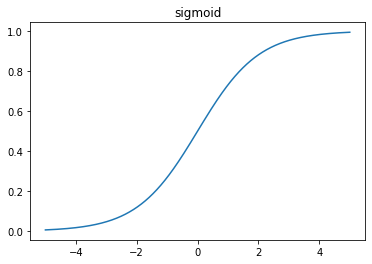

In [7]:
x=np.linspace(-5,5,2000)
y=1/(1+np.exp(-x))
plt.plot(x,y)
plt.title("sigmoid");

### ReLU
$y={\displaystyle \begin{equation}
\begin{cases} &x \:\:\: x\geqslant0 \\
& 0 \:\:\: x<0
\end{cases}
\end{equation}}$
<br><br>$y\in[0,\infty)$
<br><br>$y'=\begin{equation}
\begin{cases}
& 1\:\:\: x\geqslant0 \\
& 0\:\:\: x<0
\end{cases}
\end{equation}$


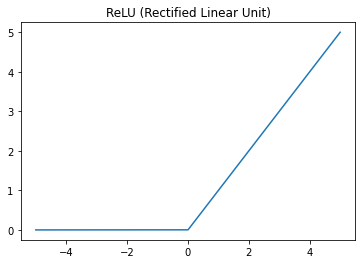

In [8]:
x=np.linspace(-5,5,2000)
y=x*(x>=0)
plt.plot(x,y)
plt.title("ReLU (Rectified Linear Unit)");

### softmax
$y_i=f_i(\vec{x})={\displaystyle \frac{e^{x_i}}{\sum_{j=1}^J e^{x_j}}}$
<br>$y_i\in[0,1]$
<br><br>${\displaystyle \frac{\partial y_i}{\partial x_j}=y_i(\delta_{ij}-y_j)}$


### Many more activation functions
[Check here](https://en.wikipedia.org/wiki/Activation_function)

## Some useful materials for better understanding NN
[Neural Networks, Manifolds, and Topology - Colah's blog](http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/)<br>
[How the backpropagation algorithm works - Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap2.html
)